# **Project Name:**  
##Unsupervised Learning for Tailored Banking Solutions(Customer Segmentation)

##### **Project Type**    - Clustring
##### **Contribution**    - Individual
##### **Member Name -** Mazen Asag

# **Project Summary -**

# **Objective**  
In this data science project, the goal is to perform customer segmentation for active credit card users using unsupervised learning techniques. The aim is to identify patterns in customer behavior and classify them into distinct groups to help financial institutions better understand and serve their customers.  

# **Scope**  
Customer segmentation is a vital process in the banking and financial sector to enhance customer relationship management, develop personalized offers, and maximize profitability. This project leverages clustering techniques to identify customer groups based on their credit card usage and payment behavior.  

# **Key Components**  
- **Behavioral Analysis:** Understand patterns such as balance maintenance, purchasing habits, and cash advances.  
- **Transaction Frequency:** Examine how frequently customers make purchases or cash advances.  
- **Payment and Credit Analysis:** Analyze payment behavior, credit limits, and usage efficiency.  
- **Clustering Models:** Apply techniques like K-Means and Hierarchical Clustering to group customers based on their behaviors.  

# **Dataset Description**  
The dataset summarizes the usage behavior of approximately 9000 active credit card holders over the last 6 months. It includes the following features:  
- **CUSTID:** Identification of Credit Card holder (Categorical)  
- **BALANCE:** Balance amount left in their account to make purchases  
- **BALANCEFREQUENCY:** Frequency of balance updates (score between 0 and 1)  
- **PURCHASES:** Total amount of purchases made  
- **ONEOFFPURCHASES:** Maximum amount spent in a single purchase  
- **INSTALLMENTSPURCHASES:** Purchases made in installments  
- **CASHADVANCE:** Cash in advance taken by the user  
- **PURCHASESFREQUENCY:** Frequency of purchases (score between 0 and 1)  
- **ONEOFFPURCHASESFREQUENCY:** Frequency of one-off purchases (score between 0 and 1)  
- **PURCHASESINSTALLMENTSFREQUENCY:** Frequency of installment-based purchases (score between 0 and 1)  
- **CASHADVANCEFREQUENCY:** Frequency of cash advance payments  
- **CASHADVANCETRX:** Number of cash advance transactions  
- **PURCHASESTRX:** Number of purchase transactions  
- **CREDITLIMIT:** Credit card limit for the user  
- **PAYMENTS:** Total payment amount by the user  
- **MINIMUM_PAYMENTS:** Minimum payment made by the user  
- **PRCFULLPAYMENT:** Percentage of full payments made by the user  
- **TENURE:** Duration of credit card usage in months  

# **Implementation**  
1. **Data Preprocessing:**  
   - Handle missing values in features like `MINIMUM_PAYMENTS` and `CREDITLIMIT`.  
   - Standardize numerical features for effective clustering.  
   - Remove or transform outliers to prevent distortion in clustering.  

2. **Clustering Methods:**  
   - Experiment with K-Means, Hierarchical Clustering, and DBSCAN.  
   - Determine the optimal number of clusters using methods like the elbow method and silhouette score.  

3. **Evaluation:**  
   - Assess cluster quality using metrics such as silhouette score and visualize clusters using PCA or t-SNE.  

# **Outcome**  
The project will deliver actionable customer segments that can help banks tailor their marketing strategies, improve customer satisfaction, and optimize credit card offerings.  



In [84]:
# prompt: import all needed library for ML projct

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [85]:
df = pd.read_csv('/content/GENERAL.csv')

In [86]:
pd.options.display.max_columns =None

In [38]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [88]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [94]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [90]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

<ipython-input-90-ce142c09bb21>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)


In [93]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)

<ipython-input-93-429ad7456eb0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)


In [95]:
df.drop('CUST_ID' ,axis=1 ,inplace=True)

In [96]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [97]:
df.columns.size

17

<ipython-input-98-2d3a3b2c534c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, color='skyblue', bins=30)
<ipython-input-98-2d3a3b2c534c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, color='skyblue', bins=30)
<ipython-input-98-2d3a3b2c534c>:9: UserWarni

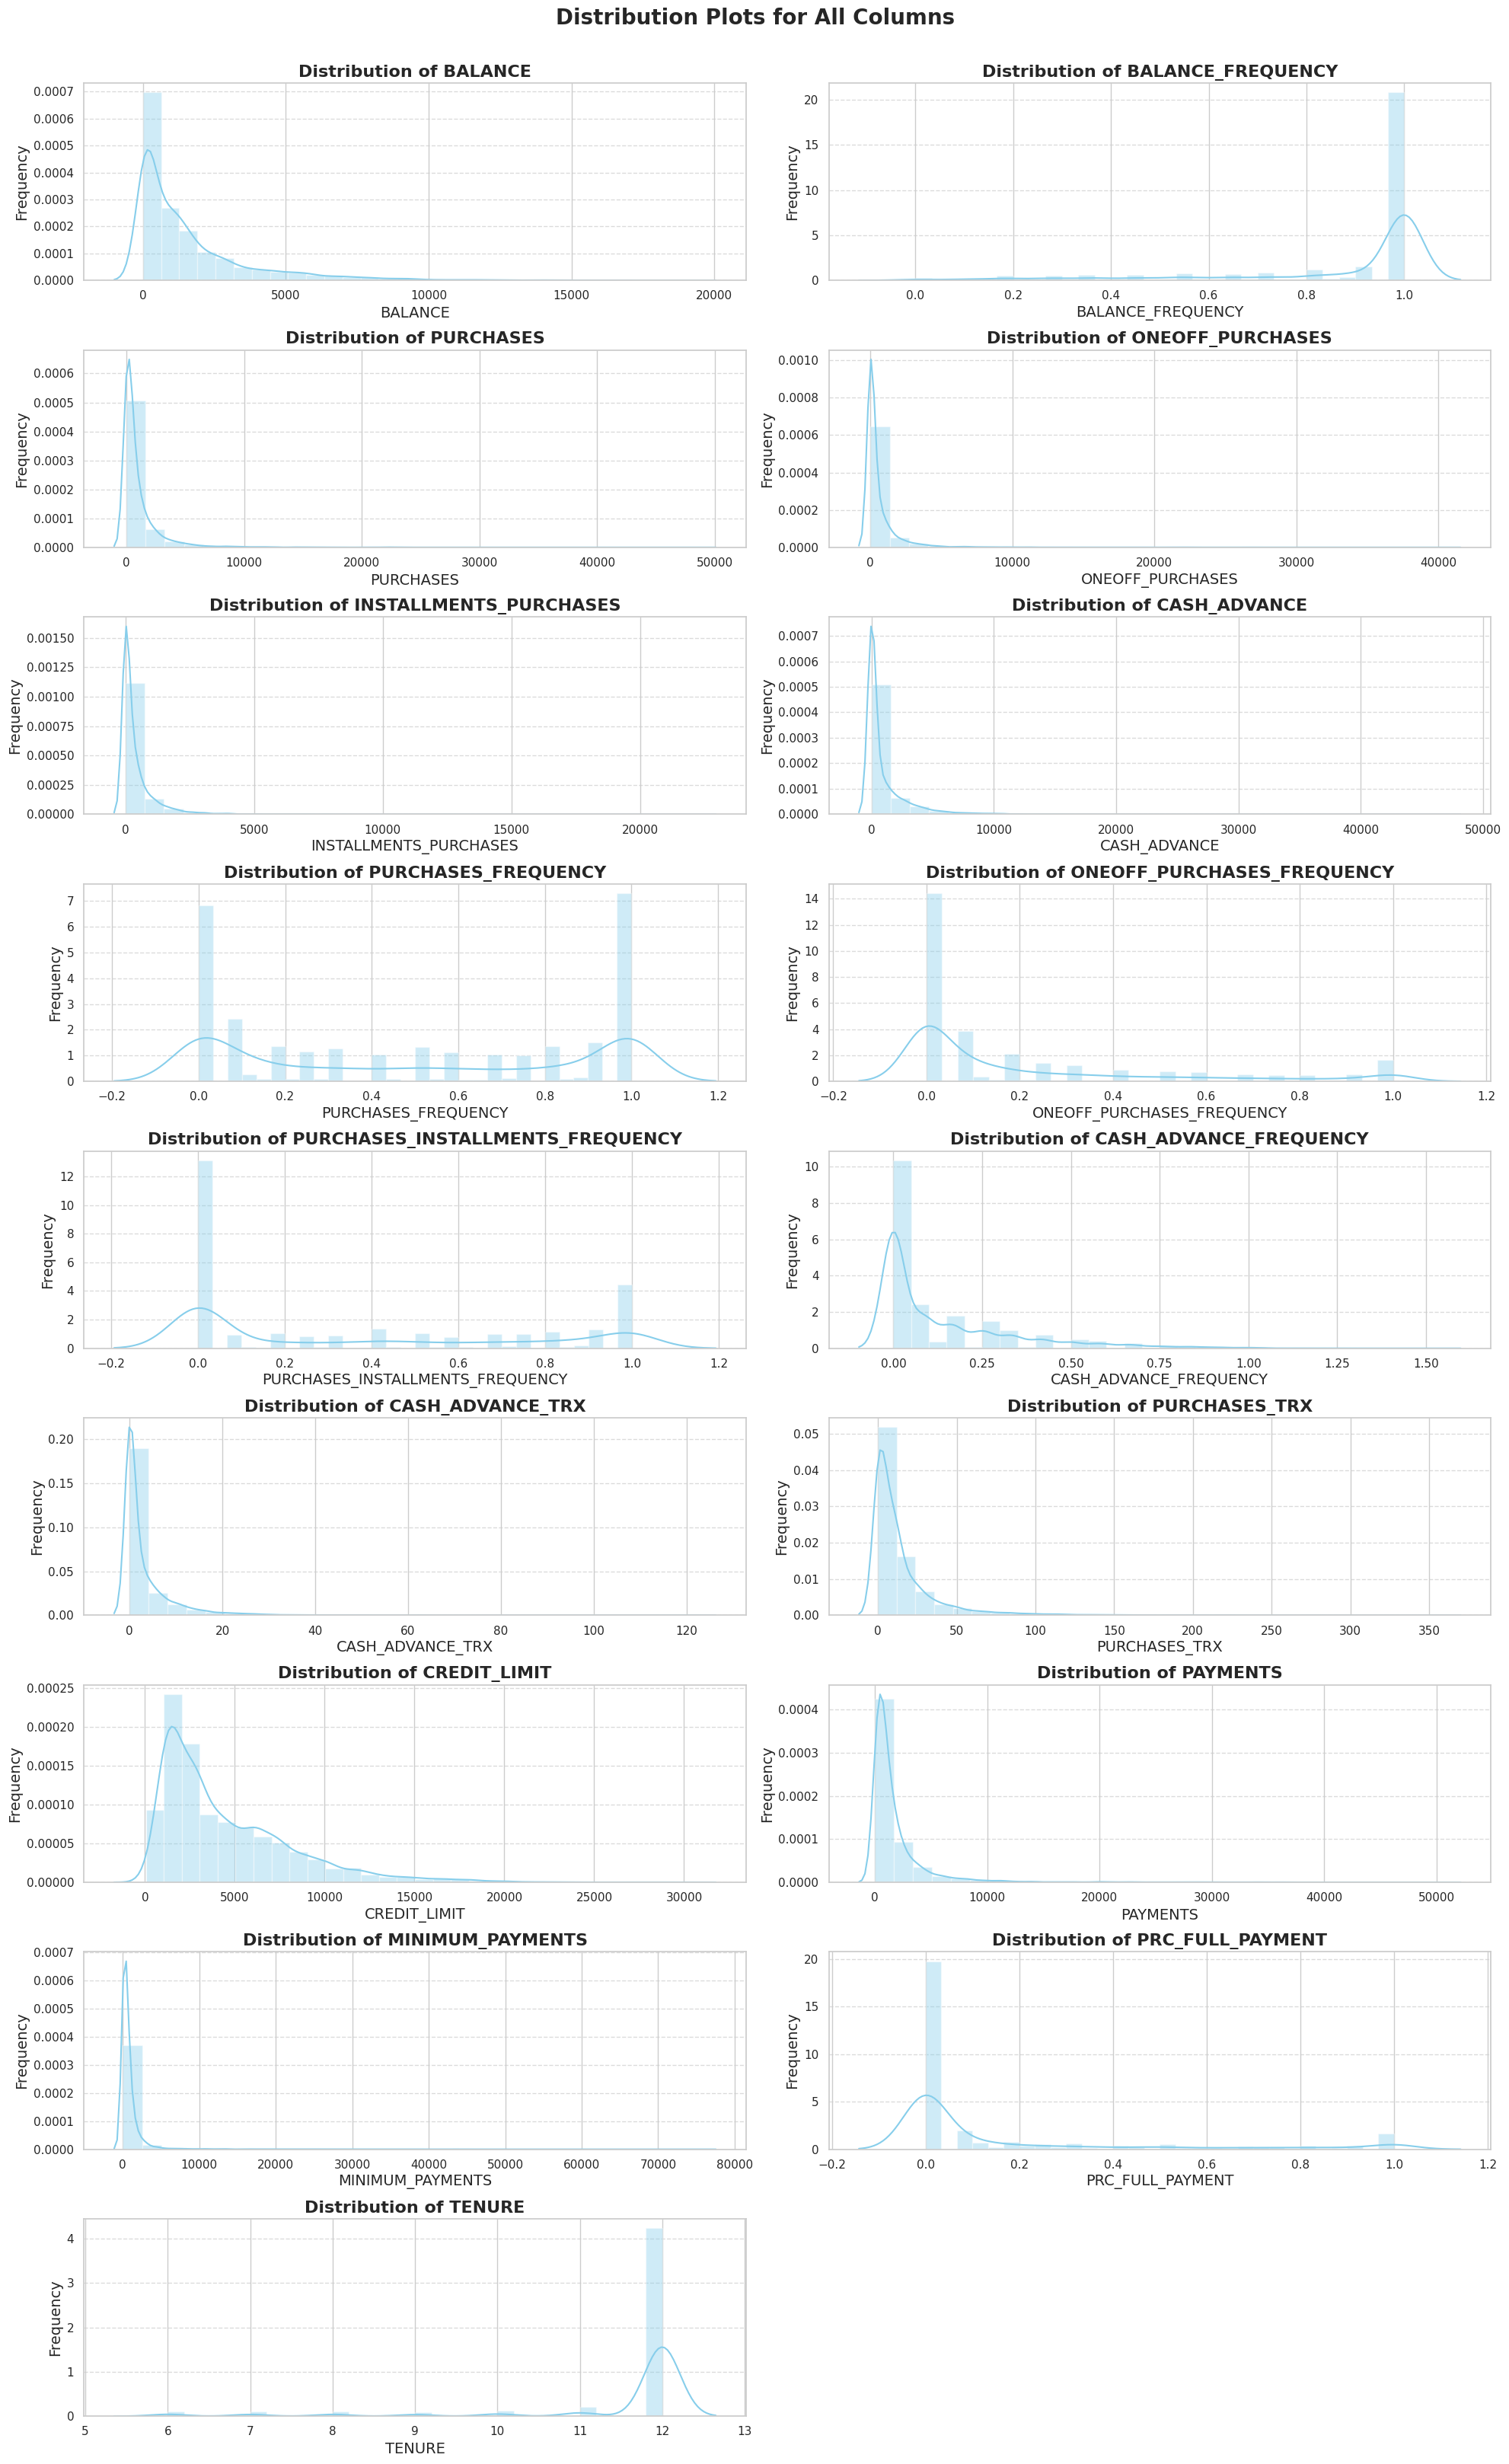

In [98]:
sns.set_theme(style="whitegrid")

# Create figure with custom size
plt.figure(figsize=(20, 33))

# Loop through each column in DataFrame
for i, col in enumerate(df.columns):
    plt.subplot((len(df.columns) + 1) // 2, 2, i + 1)  # Automatically adjust rows and columns
    sns.distplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Distribution Plots for All Columns', fontsize=20, fontweight='bold')
plt.show()

###Since the data is very skewed, we reduce skewness using square root method
##**square** root transformation helps in reducing skewness in data, particularly for positively

In [99]:
df_copy =df.copy()

<ipython-input-100-5cb49ebabc33>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy[col], kde=True, color='skyblue', bins=30)
<ipython-input-100-5cb49ebabc33>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy[col], kde=True, color='skyblue', bins=30)
<ipython-input-100-5cb49ebabc3

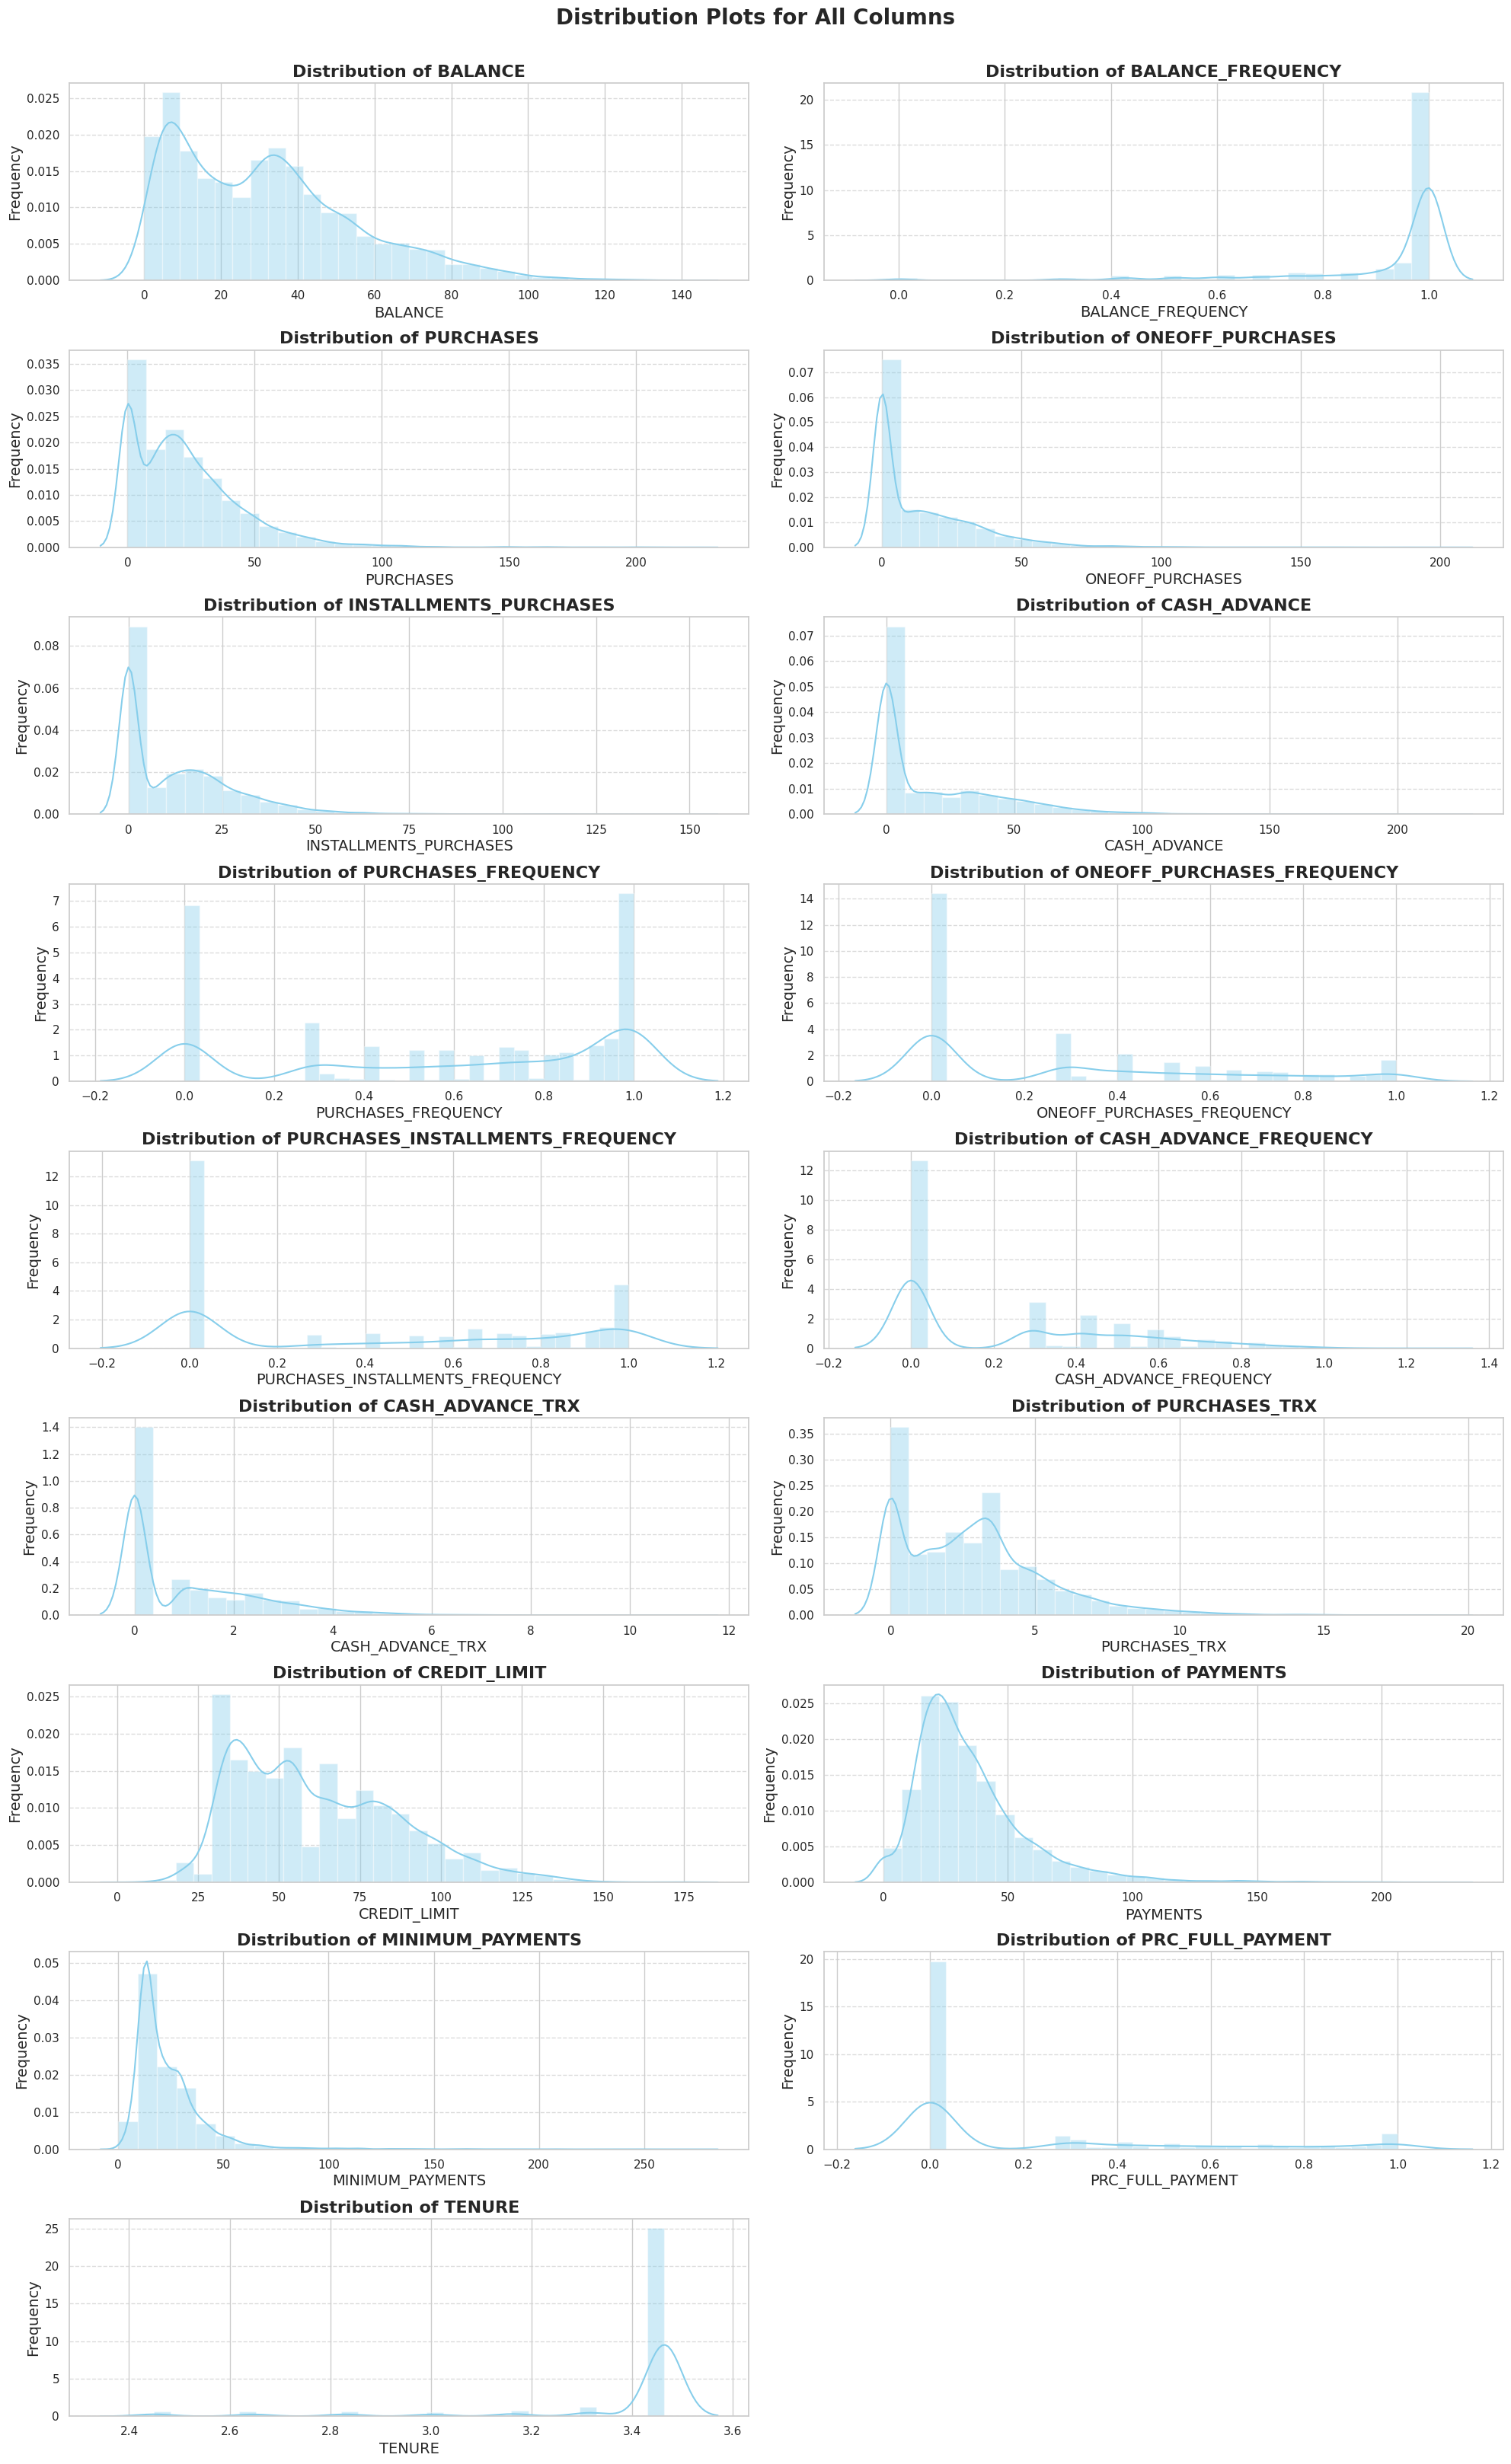

In [100]:
sns.set_theme(style="whitegrid")

# Create figure with custom size
plt.figure(figsize=(20, 33))
for col in df.columns:
  df_copy[col] =np.sqrt(df_copy[col])
  # Loop through each column in DataFrame
for i, col in enumerate(df.columns):
    plt.subplot((len(df_copy.columns) + 1) // 2, 2, i + 1)  # Automatically adjust rows and columns
    sns.distplot(df_copy[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Distribution Plots for All Columns', fontsize=20, fontweight='bold')
plt.show()

In [101]:
corr_matrix = df_copy.corr()

<Axes: >

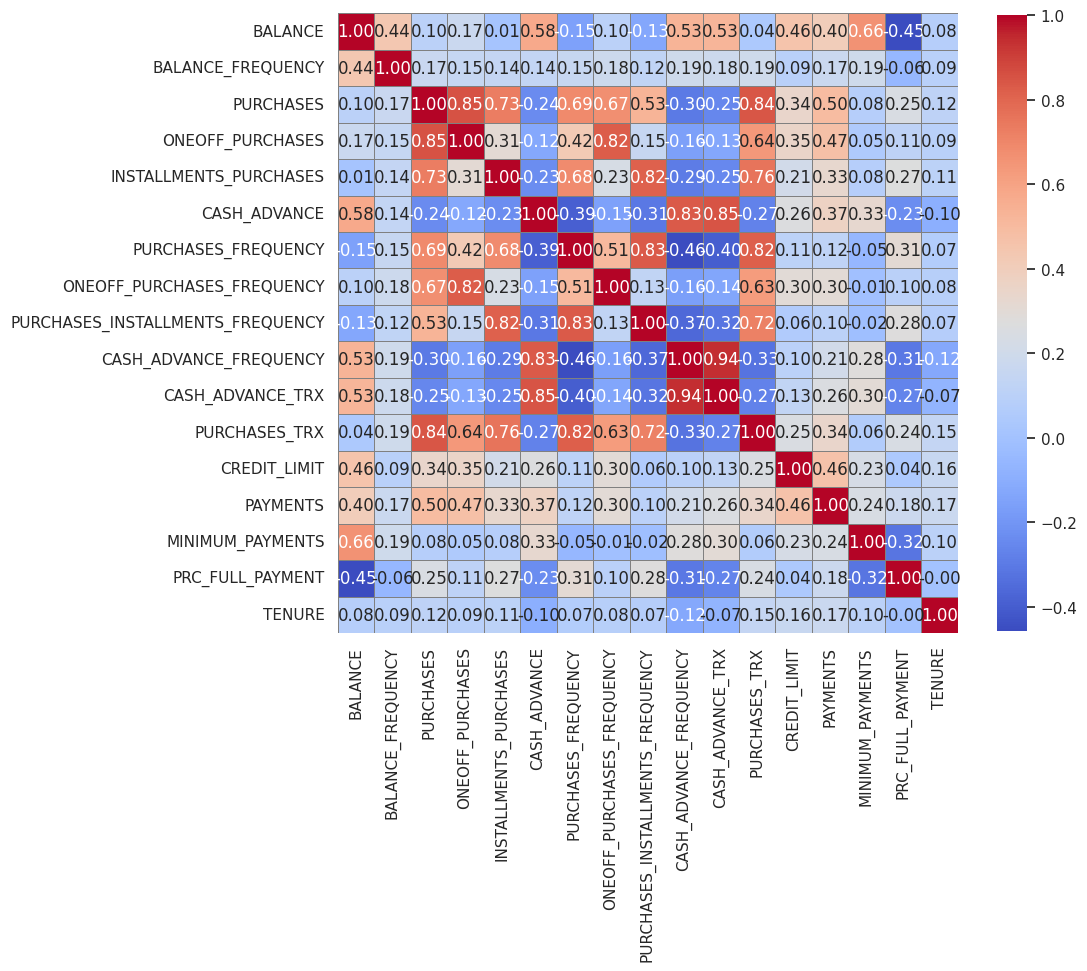

In [102]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', cbar_kws={'shrink': 0.8},  fmt='.2f',
    linewidths=0.5,
    linecolor='gray',
    square=True)


### Scale the data using Standard Scaler

In [103]:
sc=StandardScaler()
df_scaled=sc.fit_transform(df_copy)

In [104]:
scaled_fram=pd.DataFrame(df_scaled,columns=df_copy.columns)

In [105]:
scaled_fram.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [114]:
df_scaled


array([[-1.0780545 , -0.09712559, -0.59690132, ..., -0.66790184,
        -0.63618182,  0.35348056],
       [ 1.05361908,  0.19053935, -1.0423371 , ...,  0.52254404,
         0.78887411,  0.35348056],
       [ 0.77167992,  0.46414608,  0.22574803, ...,  0.08464159,
        -0.63618182,  0.35348056],
       ...,
       [-1.14422589, -0.04811222, -0.49431949, ..., -0.82330785,
         0.87531901, -4.27612743],
       [-1.19386072, -0.04811222, -1.0423371 , ..., -0.91494252,
         0.87531901, -4.27612743],
       [-0.52978249, -0.61472285,  0.46555636, ..., -0.8052387 ,
        -0.63618182, -4.27612743]])

In [116]:
pca=PCA(n_components=2,random_state=12)
princepalComponent=pca.fit_transform(df_scaled)
df_pca=pd.DataFrame(data=princepalComponent,columns=['PC1','PC2'])

In [117]:
df_pca

,PC1,PC2
0,-0.885217,-2.482969
1,-3.000240,2.015255
2,1.191773,0.385186
3,-0.794760,0.218509
4,-1.265122,-1.593251
...,...,...
8945,0.668352,-2.871799
8946,0.262488,-2.240376
8947,0.105825,-3.066841
8948,-2.847285,-2.517970


In [118]:
from yellowbrick.cluster import KElbowVisualizer


###**Kmeans Clustering**
 clustering is used to segment credit card customers based on their financial behavior. After performing PCA for dimensionality reduction, we apply KMeans to identify distinct customer segments.

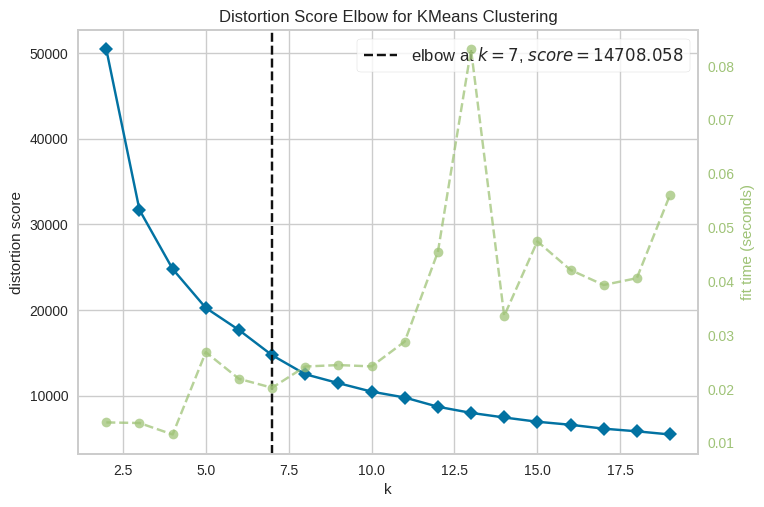

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [204]:
model=KMeans(random_state=42)
distortion_visualizer=KElbowVisualizer(model,k=(2,20))
distortion_visualizer.fit(df_pca)
distortion_visualizer.show()


In [205]:
C_n=distortion_visualizer.elbow_value_

In [206]:
kmeans=KMeans(n_clusters=6,random_state=12)
kmeans.fit(df_pca)
labels=kmeans.labels_
clusters=pd.concat([df, pd.DataFrame({'Cluster':labels})], axis=1)


In [207]:
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


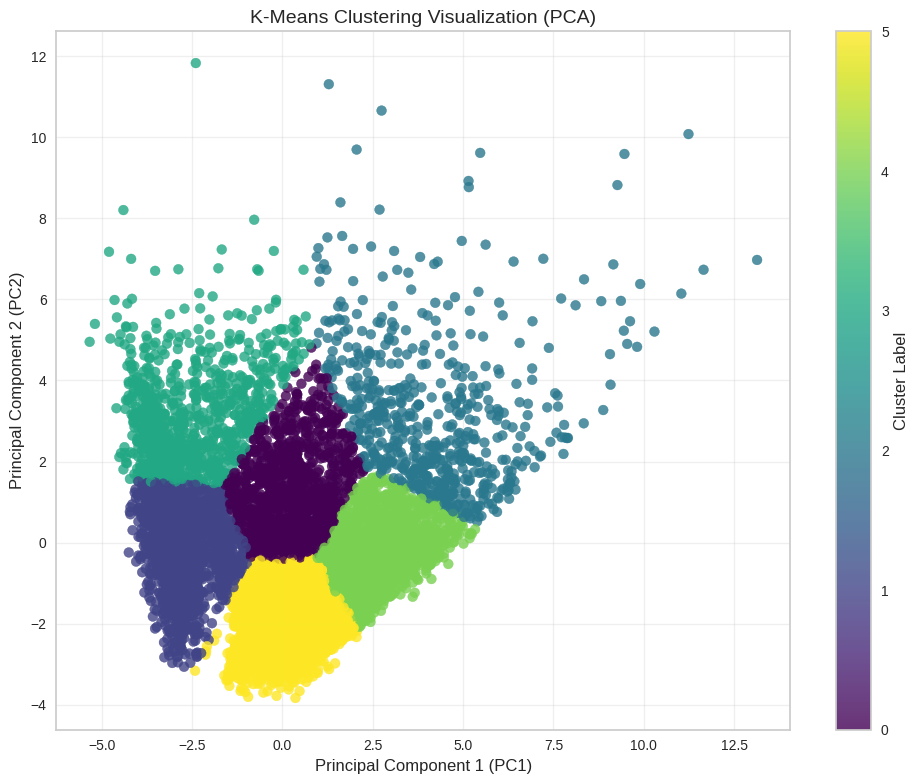

In [208]:
# Visualize the clusters using PCA components
plt.figure(figsize=(10, 8))  # Slightly larger for clarity
scatter = plt.scatter(
    df_pca['PC1'],
    df_pca['PC2'],
    c=clusters['Cluster'],
    cmap='viridis',
    s=50,  # Adjust marker size for better visibility
    alpha=0.8  # Add transparency for overlapping points
)
plt.title('K-Means Clustering Visualization (PCA)', fontsize=14)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)

# Add colorbar for better cluster interpretation
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label', fontsize=12)

# Add gridlines for better readability
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


<ipython-input-209-32bc8315b365>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


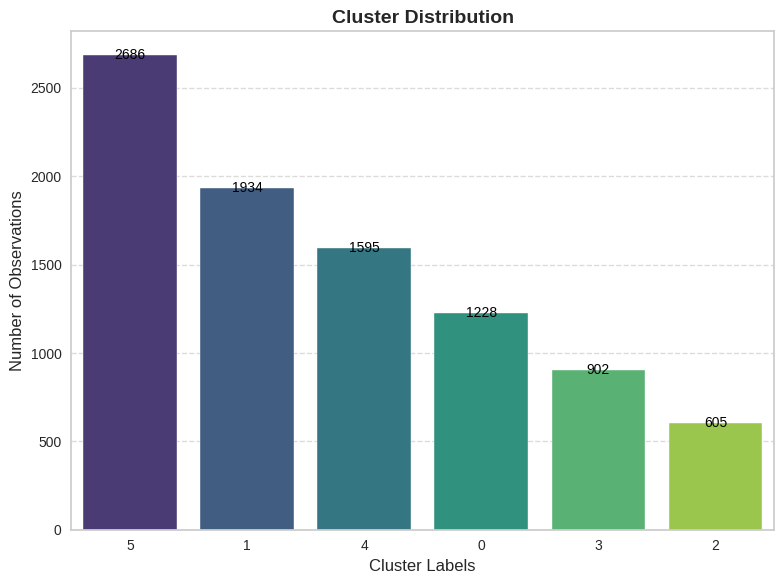

In [209]:
# Countplot for cluster distribution
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.countplot(
    x="Cluster",
    data=clusters,
    palette="viridis",  # Use a visually appealing color palette
    order=clusters["Cluster"].value_counts().index  # Order bars by frequency
)
plt.title("Cluster Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Cluster Labels", fontsize=12)
plt.ylabel("Number of Observations", fontsize=12)

# Add value labels on top of bars
for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,  # Center of bar
        p.get_height() + 0.5,  # Slightly above the bar
        int(p.get_height()),  # Convert to integer for display
        ha="center", va="center", fontsize=10, color="black"
    )

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add horizontal gridlines for readability
plt.tight_layout()
plt.show()


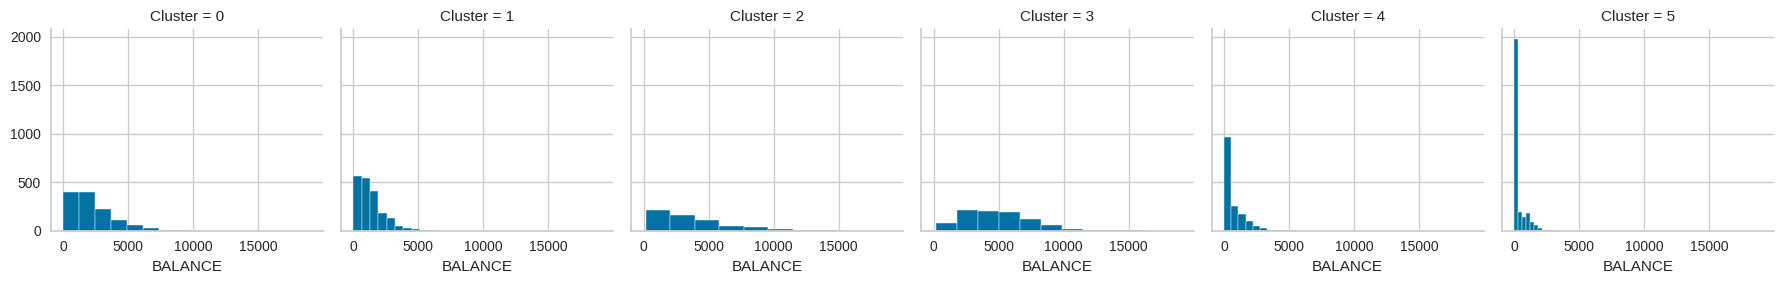

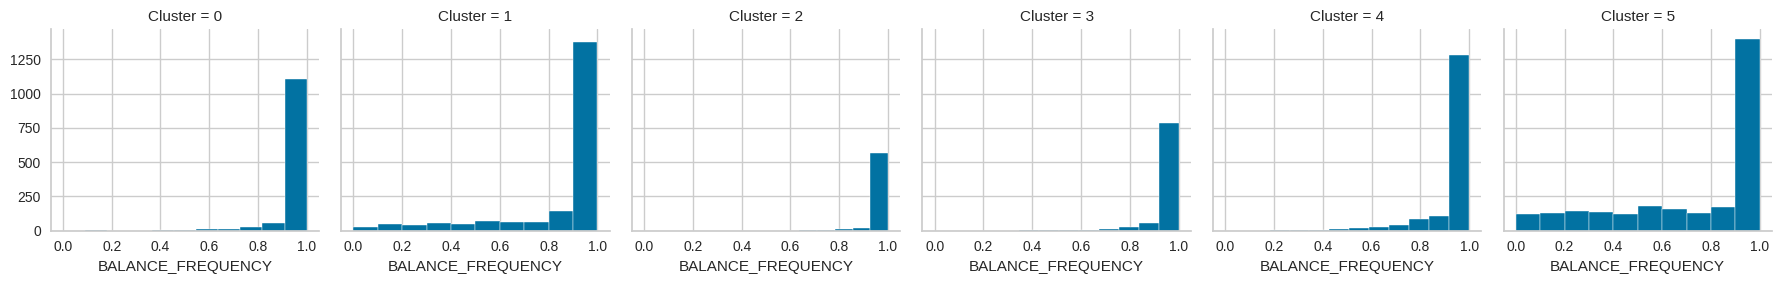

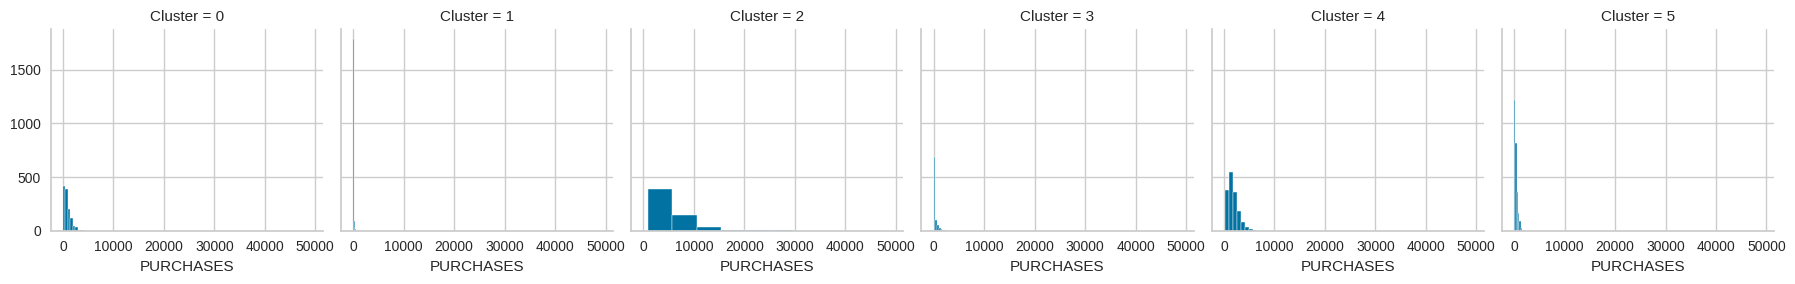

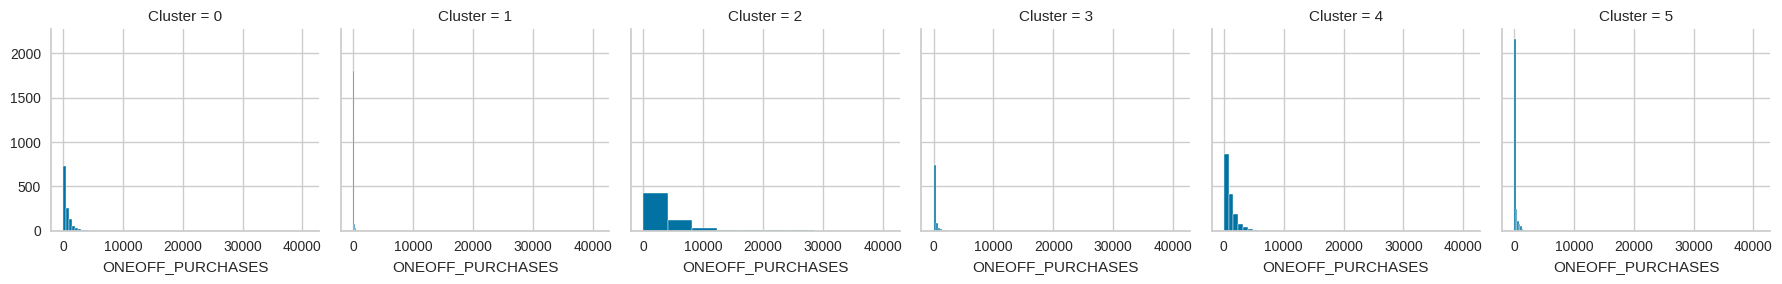

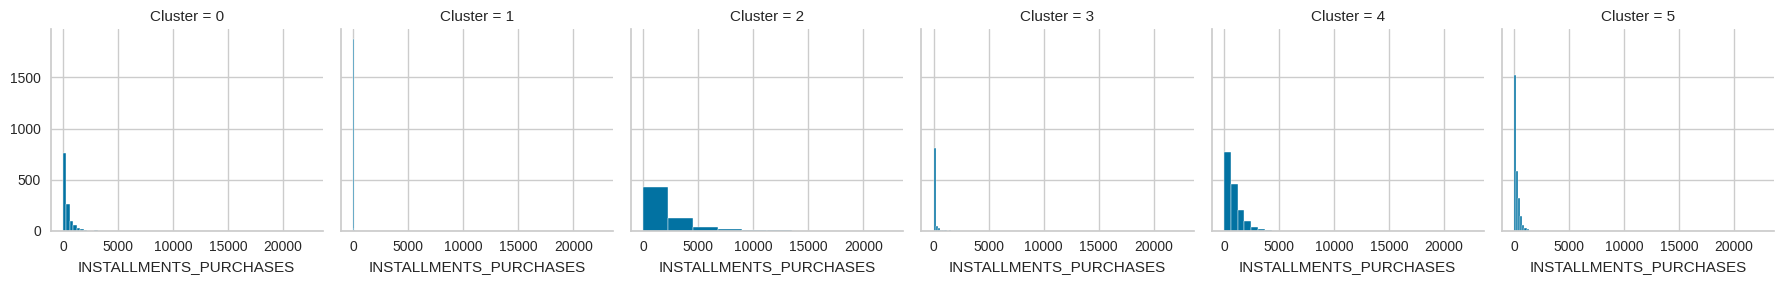

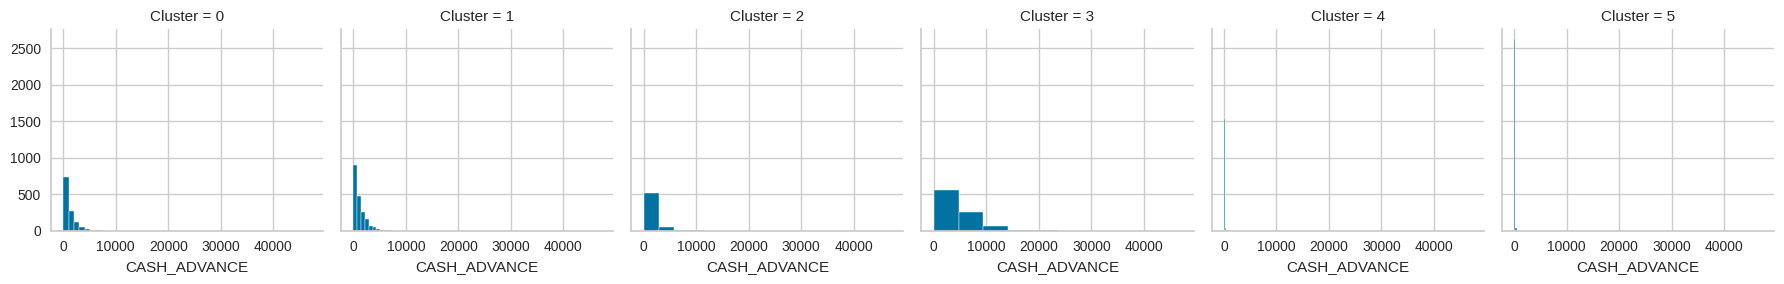

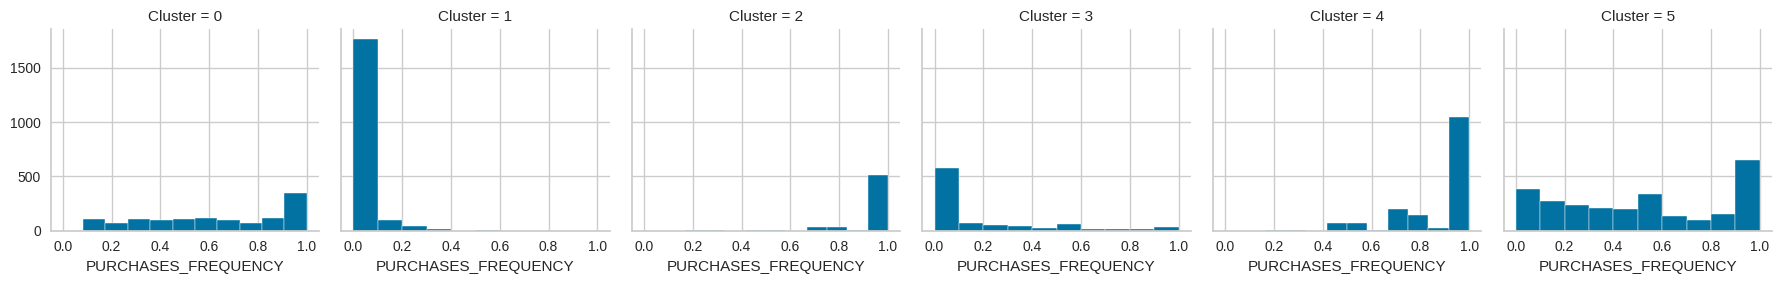

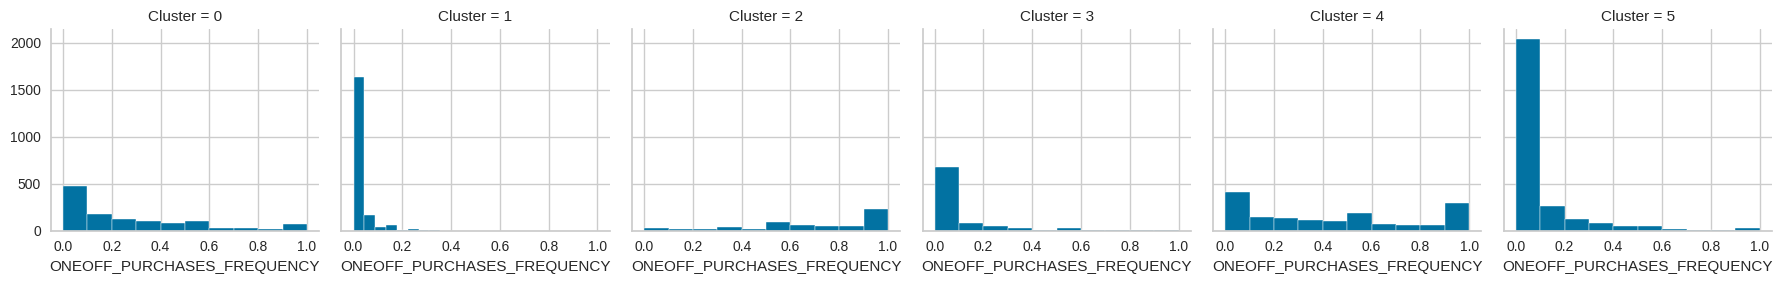

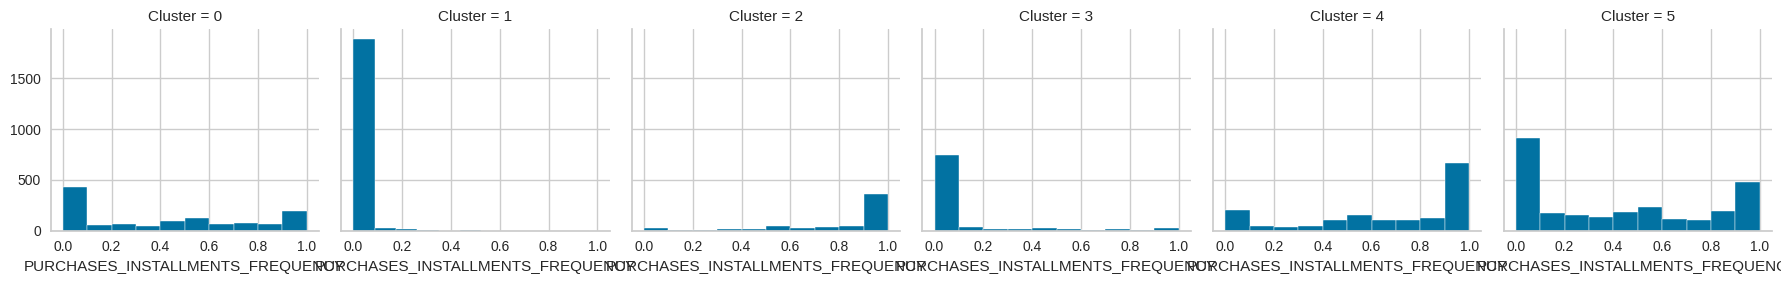

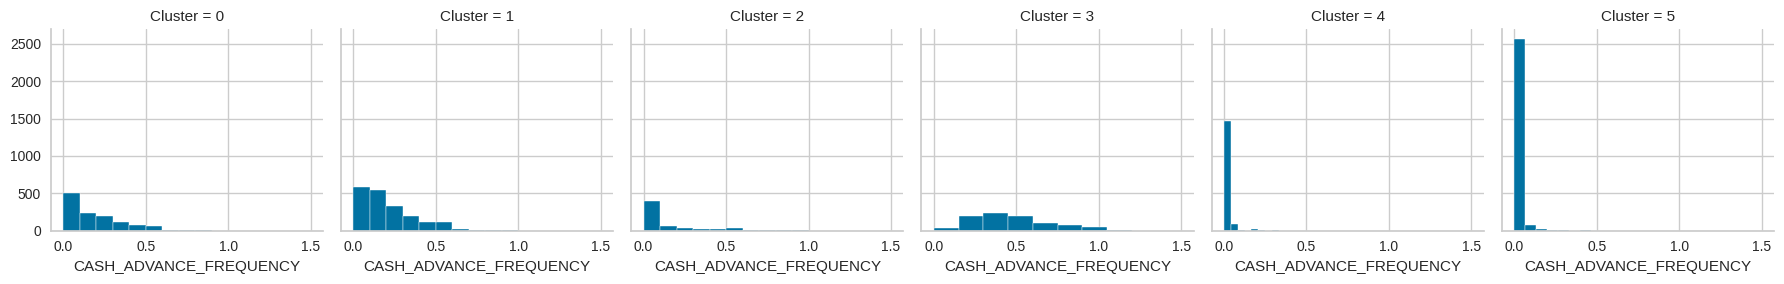

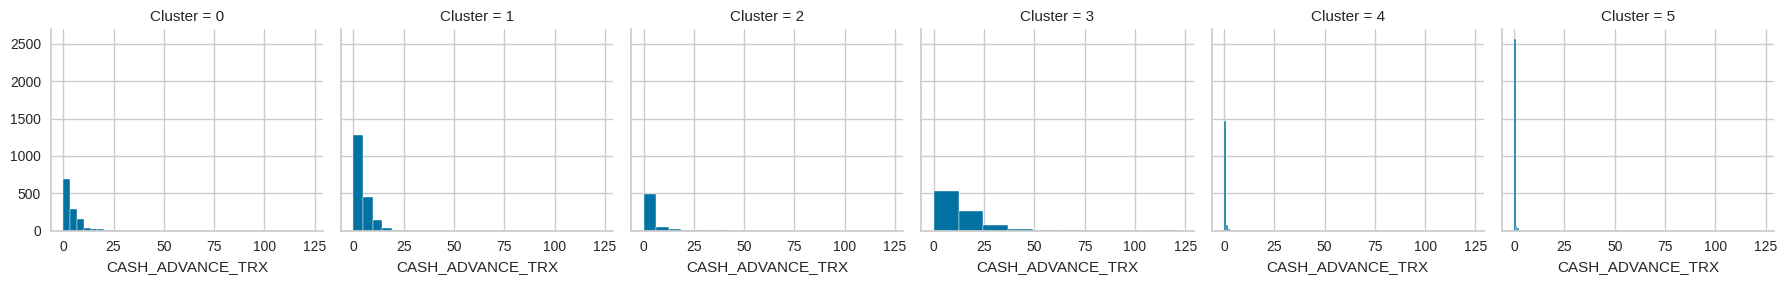

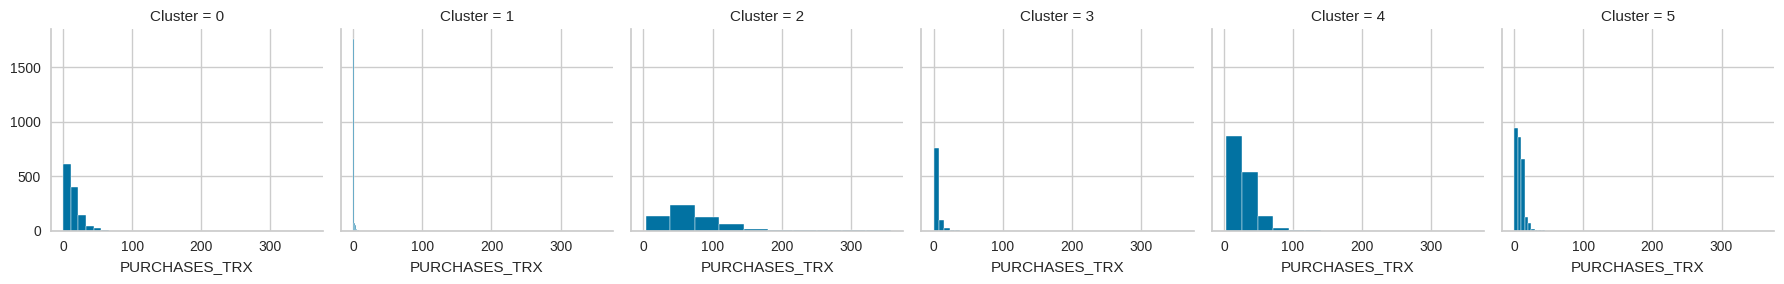

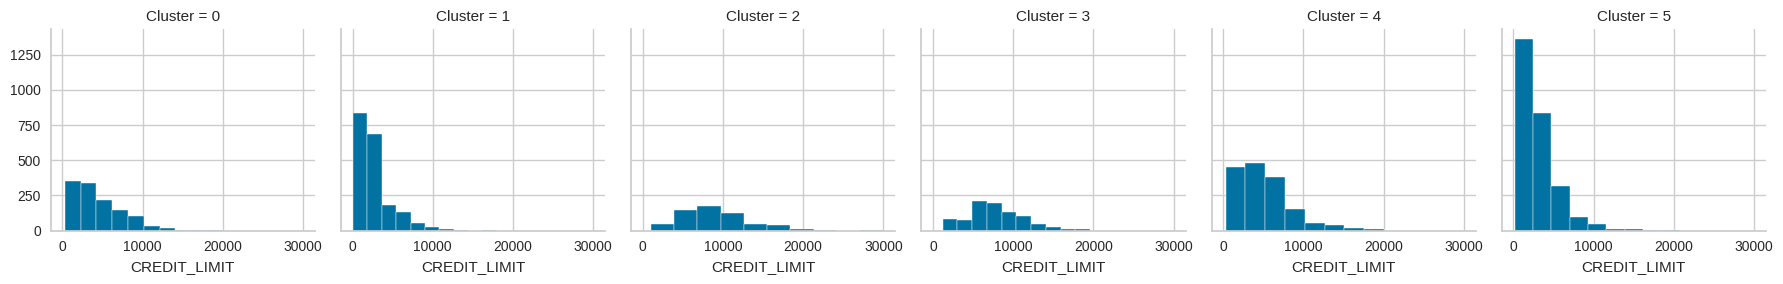

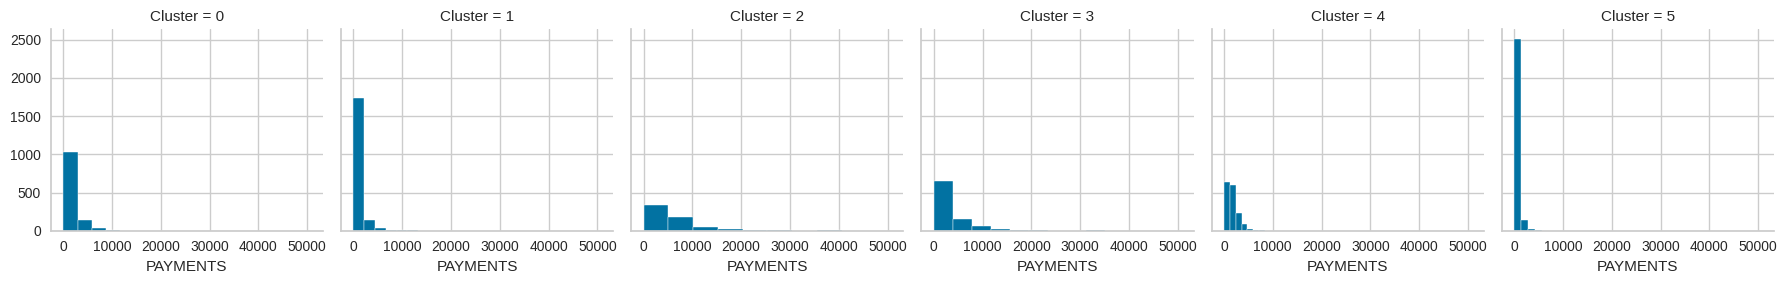

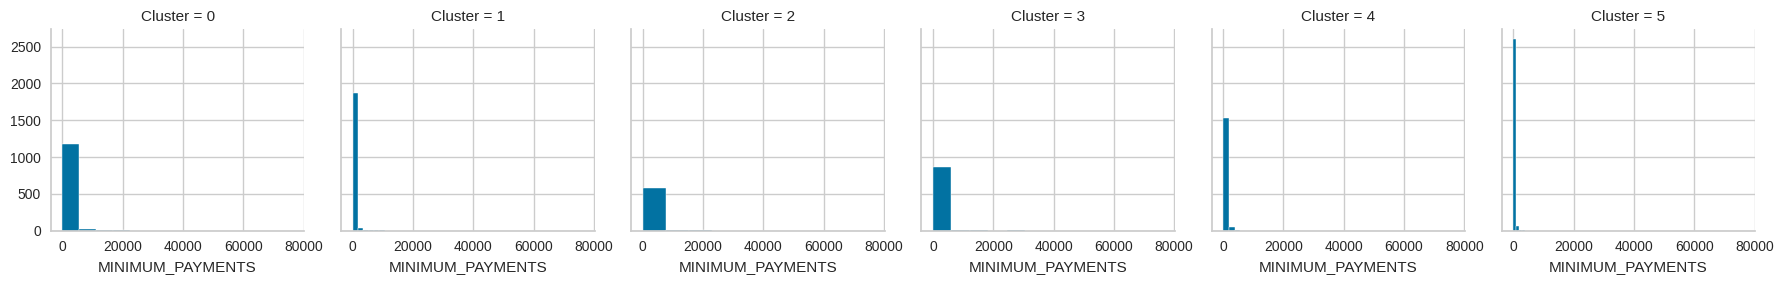

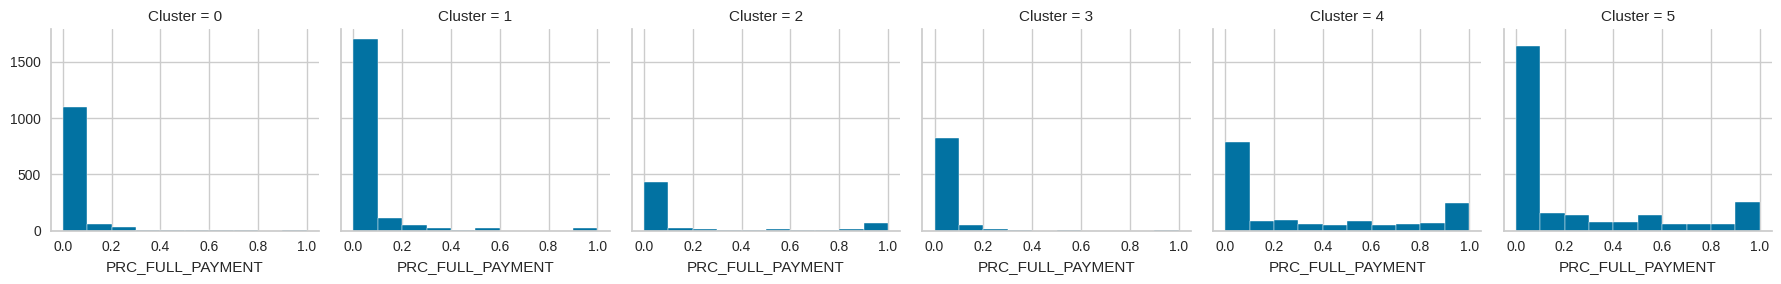

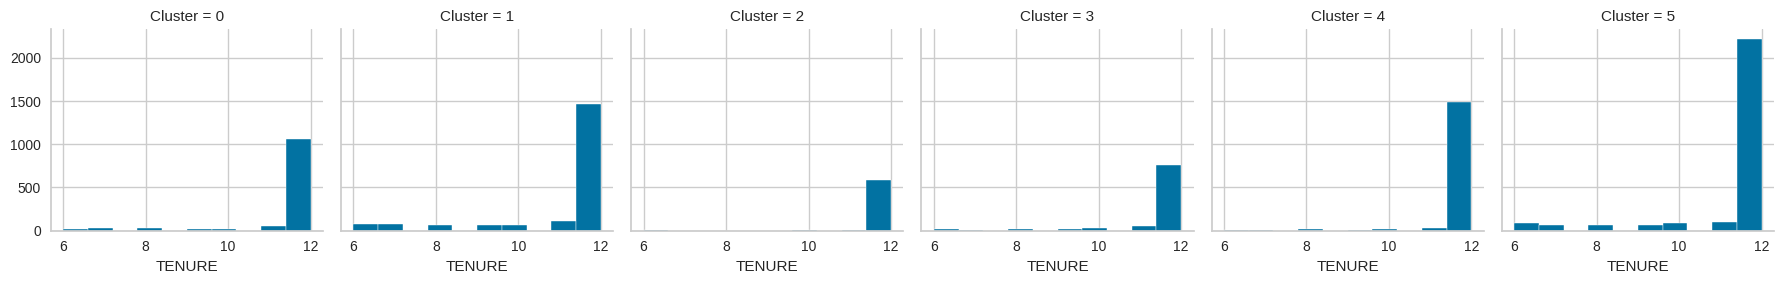

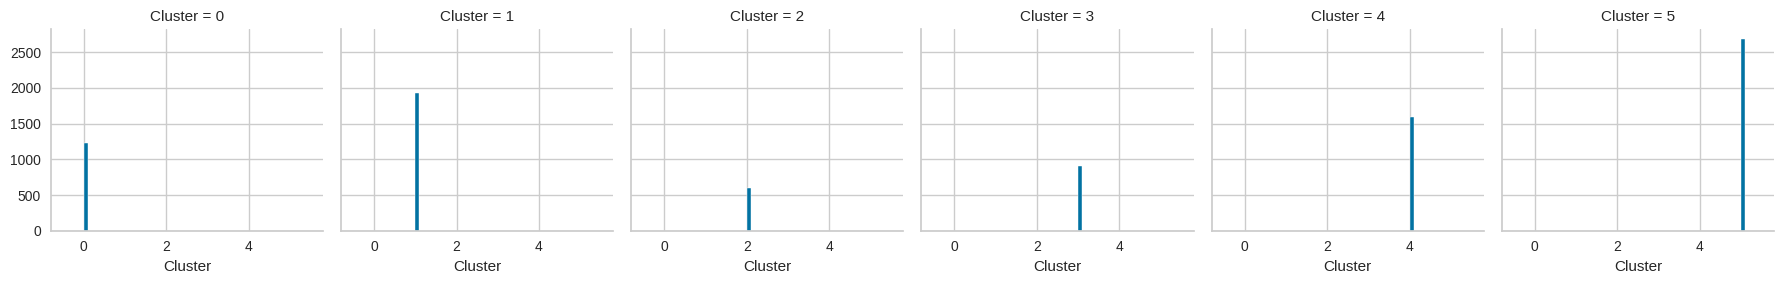

In [210]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='Cluster')
    grid.map(plt.hist, c)

In [214]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [215]:
davies_bouldin = davies_bouldin_score(df_pca, labels)
silhouette = silhouette_score(df_pca, labels)

# Display results
print(f"{'Clustering Evaluation Metrics (n_clusters={6})':^60}")
print("-" * 60)
print(f"Davies-Bouldin Index : {davies_bouldin:.4f}")
print(f"Silhouette Score      : {silhouette:.4f}")
print("-" * 60)

       Clustering Evaluation Metrics (n_clusters={6})       
------------------------------------------------------------
Davies-Bouldin Index : 0.8160
Silhouette Score      : 0.3972
------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


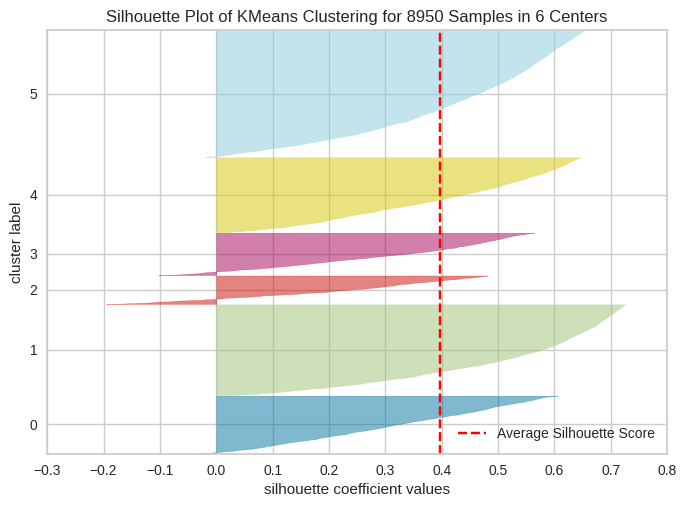

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [216]:
pca_df = pd.concat([df_pca, pd.DataFrame({'Cluster':labels})], axis=1)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(pca_df.drop(['Cluster'],axis=1))
visualizer.show()

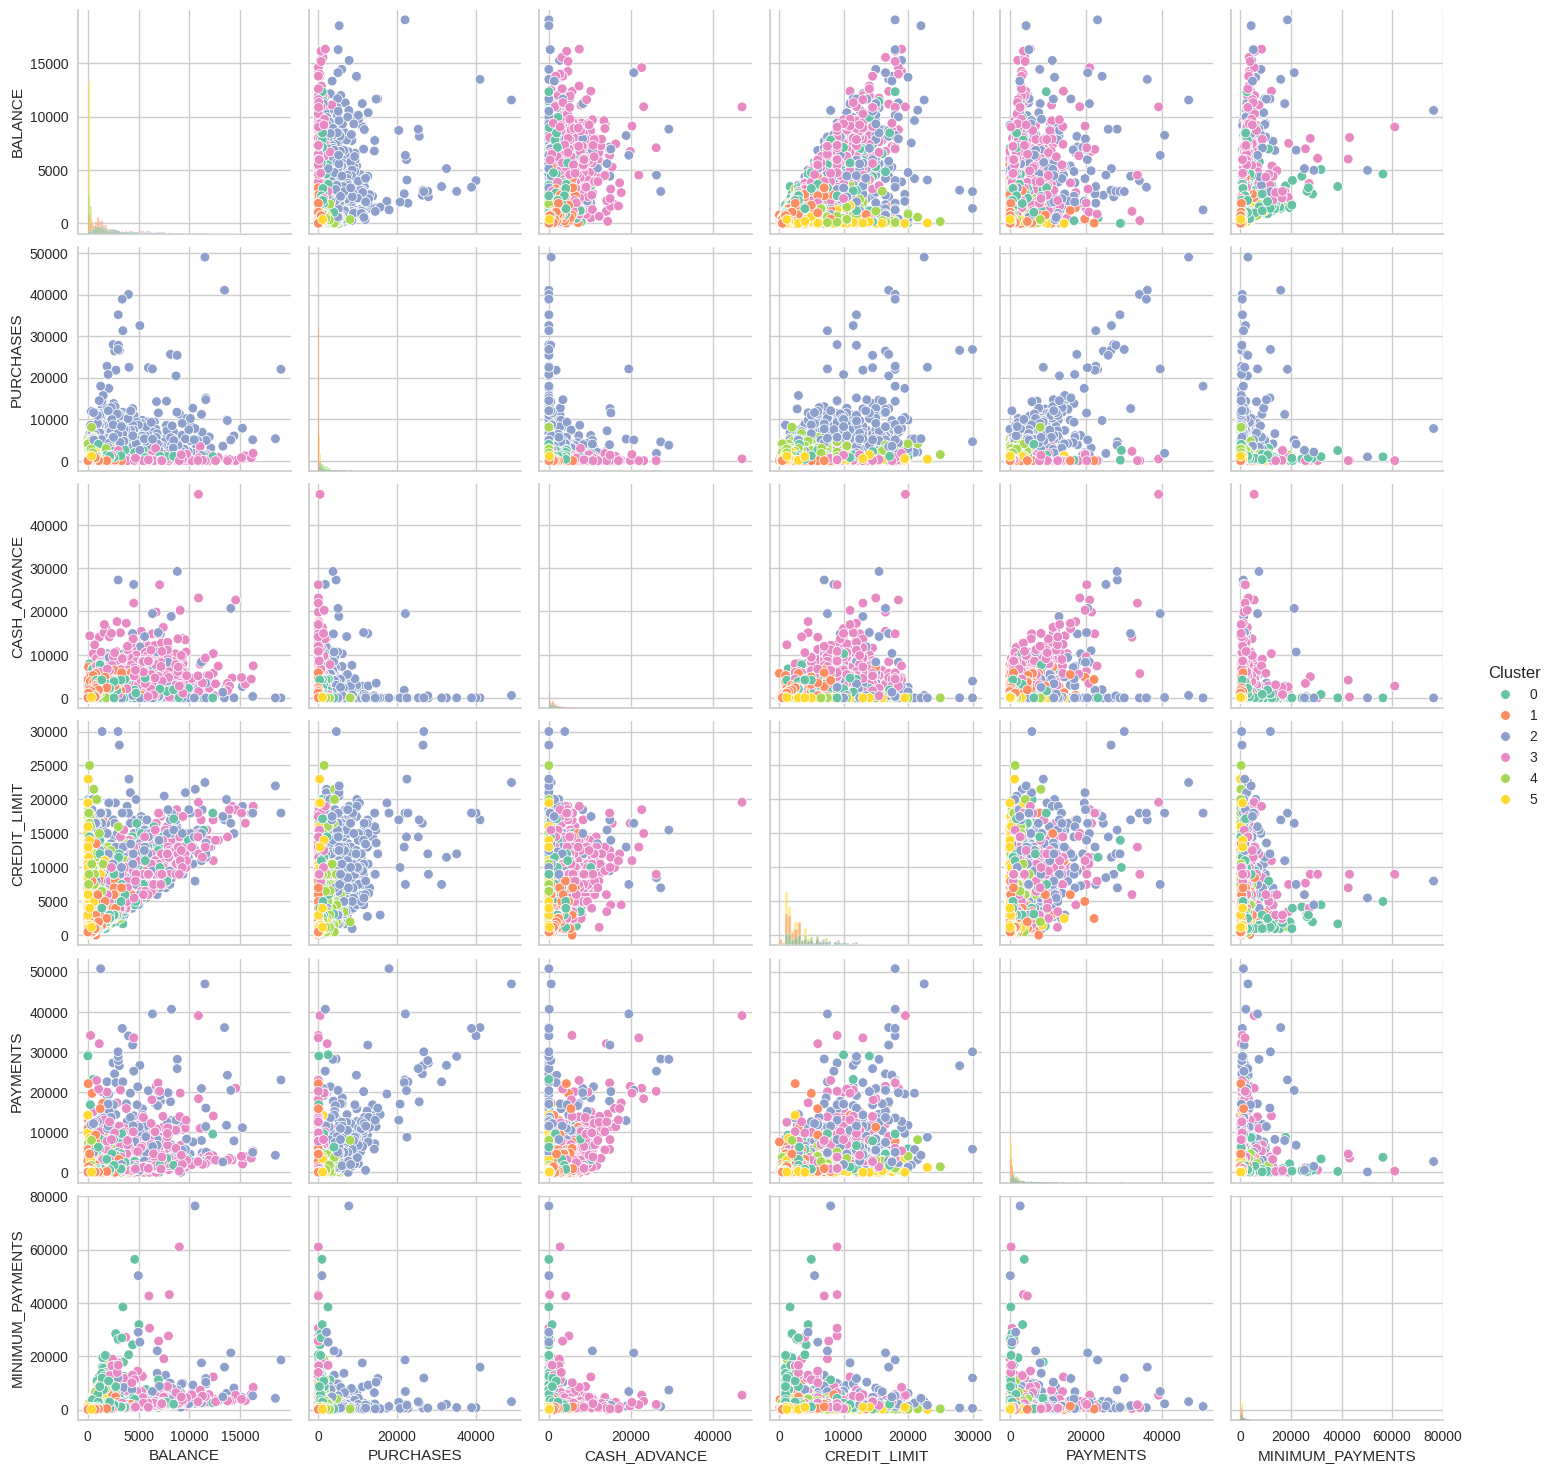

In [217]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", 'Cluster']
sns.pairplot( clusters[ best_cols ], hue="Cluster", palette='Set2', diag_kind="hist")

In [218]:
analysis_cluster = clusters.groupby('Cluster').apply(lambda x: x.mean()).T
analysis_cluster

<ipython-input-218-aff50aa7ee8b>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  analysis_cluster = clusters.groupby('Cluster').apply(lambda x: x.mean()).T


Cluster,0,1,2,3,4,5
BALANCE,2247.187882,1304.270855,3754.472261,4972.415493,728.382687,298.472925
BALANCE_FREQUENCY,0.969092,0.865929,0.988395,0.973527,0.953431,0.740878
PURCHASES,891.732809,28.530765,6157.391140,261.548448,1789.716232,377.036910
ONEOFF_PURCHASES,555.158290,24.790134,4058.172562,192.694357,952.497580,158.003582
INSTALLMENTS_PURCHASES,337.162378,3.750972,2099.218579,68.966807,837.676075,219.447878
CASH_ADVANCE,1113.955571,1144.334431,1366.598002,4737.599104,22.223009,16.479651
PURCHASES_FREQUENCY,0.635787,0.027734,0.949144,0.175375,0.885694,0.524628
ONEOFF_PURCHASES_FREQUENCY,0.272159,0.018967,0.700303,0.092281,0.432012,0.091259
PURCHASES_INSTALLMENTS_FREQUENCY,0.409419,0.007633,0.798970,0.087670,0.669046,0.414967
CASH_ADVANCE_FREQUENCY,0.192832,0.223112,0.135602,0.474787,0.009183,0.006068


### **Cluster Analysis**

**Cluster 0:**  
Customers in this cluster exhibit moderate spending behavior with a balance that reflects consistent credit usage. They tend to make both regular purchases and installment-based purchases but also rely on cash advances more than other clusters. Their payment behavior is balanced, though they don't make a large percentage of full payments. This group likely includes users who regularly manage credit and are moderately active in terms of financial transactions.

---

**Cluster 1:**  
Cluster 1 customers have a low spending profile, showing minimal purchase activity and a heavy reliance on cash advances. Their usage patterns suggest they may be focused on short-term credit needs rather than long-term purchases or installments. This group could represent individuals with lower incomes or those in need of occasional financial assistance. They may benefit from products designed to address immediate cash flow issues rather than large-scale credit spending.

---

**Cluster 2:**  
Customers in Cluster 2 are highly active and have large credit limits, making substantial purchases and utilizing installment purchases frequently. They exhibit significant spending, both on one-off purchases and installments, but make relatively moderate use of cash advances. These customers likely represent affluent individuals who use credit regularly and for larger transactions. They are active and responsible users who might benefit from premium financial products such as rewards programs or higher-limit offerings.

---

**Cluster 3:**  
Cluster 3 customers are characterized by their high reliance on cash advances, making frequent cash withdrawals while showing limited activity in terms of regular purchases. This suggests that they use credit primarily to access short-term funds, possibly due to financial difficulties or irregular income streams. This group may require financial products aimed at debt management or lower-interest loans to help them manage their finances better.

---

**Cluster 4:**  
Customers in Cluster 4 show a balanced approach to spending, with frequent installment purchases and a moderate reliance on cash advances. They have a low balance but maintain consistent payments. This group is likely composed of individuals who manage credit responsibly, favoring installment-based purchases over lump-sum payments. They may benefit from flexible repayment options or rewards programs designed for customers with moderate credit usage.

---

**Cluster 5:**  
The final cluster likely shows a more varied behavior, perhaps with lower spending or different patterns of credit usage, but a detailed analysis would be needed to confirm specifics. This cluster may reflect users who either engage in minimal credit activity or have a distinct pattern of transactions that sets them apart from the other groups.

---

### **Summary:**

- **Clusters 0, 2, and 4** represent customers who are more active in using credit, with varying degrees of responsibility and regularity in payments.
- **Clusters 1 and 3** represent customers who may be struggling with financial management, relying heavily on cash advances and showing limited engagement in regular purchases.
- **Cluster 2** stands out as the group of more affluent, high-usage customers who engage with both one-off and installment-based purchases regularly.


### **Cluster Evaluation Metrics for Differents K values**

To determine the optimal number of clusters for KMeans, we evaluated the clustering performance using two metrics:

- **Davies-Bouldin Index**: Lower values indicate better-defined clusters.
- **Silhouette Score**: Higher values indicate better cluster separation.

| **Clusters (k)** | **Davies-Bouldin Index** (Lower is Better) | **Silhouette Score** (Higher is Better) |
|-------------------|--------------------------------------------|------------------------------------------|
| **2**            | 0.9771                                     | 0.4129                                   |
| **3**            | 0.8461                                     | **0.4274** (Best)                        |
| **4**            | 0.8653                                     | 0.4166                                   |
| **5**            | 0.9350                                     | 0.3748                                   |
| **6**            | **0.8160** (Best)                          | 0.3972                                   |
| **7**            | 0.7979 (Second Best)                       | 0.3925                                   |

### **Insights:**
- The optimal number of clusters is determined by balancing both metrics.
- For this dataset, **k = 3** provides the best Silhouette Score, while **k = 6** gives the lowest Davies-Bouldin Index.
- Further analysis will consider both options depending on the project goals.


### **Scenario 1: Prioritizing Cohesion (Internal Similarity of Customers)**

**Best Choice:**  
𝑘 = 3 (Highest Silhouette Score: 0.4274)

**Example: Personalized Wealth Management**

A private bank looking to offer tailored wealth management services could use 𝑘 = 3 to segment customers into homogeneous groups based on factors like investment habits, income levels, and risk tolerance.

These clusters could represent:

- **Low-risk investors:** Clients who prefer safer investment options like bonds and savings accounts. Their profile would likely show low `CASHADVANCE`, `PURCHASES`, and high `PRCFULLPAYMENT` values.
- **Moderate-risk investors:** Customers with a balanced portfolio of stocks, bonds, and other financial products, with moderate levels of `PURCHASES`, `CREDITLIMIT`, and `BALANCE`.
- **High-risk investors:** Clients willing to take higher risks with investments like stocks, crypto, or speculative assets. These individuals might have high `PURCHASESFREQUENCY`, high `PURCHASES`, and a variable `BALANCE`.

By focusing on cohesion, the bank ensures that services offered to each group are closely aligned with their individual preferences, creating a personalized and efficient wealth management experience.

---

### **Scenario 2: Prioritizing Separation (Distinct Customer Segments)**

**Best Choice:**  
𝑘 = 7 (Lowest Davies-Bouldin Index: 0.7979)

**Example: Differentiated Banking Services**

A retail bank with a broad customer base may want to clearly distinguish between different types of customers for more targeted marketing and service delivery. Using 𝑘 = 7, the bank could identify customer groups with distinct financial behaviors such as:

- **Young Professionals:** Customers who are early in their careers, interested in student loans, basic savings accounts, and investment advice. Likely to have moderate `BALANCE`, low `PURCHASES`, and high `CREDITLIMIT`.
- **Retirees:** Individuals looking for pension plans, fixed-income products, and low-risk investments. Their cluster would feature low `PURCHASES` but high `PAYMENTS` and `MINIMUM_PAYMENTS`.
- **Small Business Owners:** Clients who need business loans, credit lines, payroll management, and corporate banking. Likely to have moderate `CREDITLIMIT`, high `PURCHASESTRX`, and `INSTALLMENTSPURCHASES`.
- **High Net-Worth Individuals (HNWIs):** Wealthy customers who need customized investment strategies, tax planning, and estate management. Their clusters will have high `BALANCE`, `PURCHASES`, and high `PAYMENTS`.
- **Frequent Travelers:** Clients who may require foreign currency exchange, travel insurance, and premium credit cards with travel rewards. Likely to show high `PURCHASESFREQUENCY` and `ONEOFFPURCHASES`.

In this case, the goal is clear separation so that each customer group can receive highly specific services suited to their unique financial needs.

---

### **Scenario 3: A Balance Between Cohesion and Separation**

**Best Choice:**  
𝑘 = 6 (Second-best Silhouette Score: 0.3972, Second-lowest Davies-Bouldin Index: 0.8160)

**Example: Comprehensive Segmentation Strategy for All Bank Products**

A universal bank offering a range of products would benefit from 𝑘 = 6 clusters. This balanced segmentation can target multiple groups without oversimplifying or overcomplicating the segmentation process.

Example clusters might be:

- **Early Career Savers:** Customers who are saving for future goals and prefer low-risk savings accounts. Likely to show high `MINIMUM_PAYMENTS` and moderate `CREDITLIMIT`.
- **Middle-Aged Families:** Clients needing mortgages, insurance policies, and long-term security. Their cluster will show higher `BALANCE`, `PURCHASES`, and `PAYMENTS`.
- **Savers & Investors:** Clients who seek a variety of investment products. Likely to have high `CREDITLIMIT`, `PURCHASESFREQUENCY`, and `INSTALLMENTSPURCHASES`.
- **Credit Card Users:** Customers interested in rewards, cashback, and low-interest balance transfer options. High `ONEOFFPURCHASES` and moderate `CREDITLIMIT`.
- **Digital Banking Adopters:** Tech-savvy customers using mobile wallets and cryptocurrency. Likely to show high `PURCHASESTRX` and low `CASHADVANCE`.
- **Loan Seekers:** Individuals seeking personal, car, or home loans. Likely to show moderate `CREDITLIMIT`, `INSTALLMENTSPURCHASES`, and `BALANCE`.

This balanced segmentation ensures that services are distinct enough to meet the needs of each group, yet cohesive enough for personalized relationships.

---

### **Scenario 4: Aiming for Simplicity with Clearer Segments**

**Best Choice:**  
𝑘 = 2 (Simpler Segmentation for Efficiency)

**Example: Basic Segmentation for Core Banking Services**

A community bank may want to keep things simple by segmenting customers into just two groups:

- **Basic Service Users:** Customers who mainly use savings or checking accounts for day-to-day banking. Likely to show low `PURCHASES`, low `BALANCE`, and low `CREDITLIMIT`.
- **Premium Service Users:** Customers who engage more with the bank, using credit cards, loans, mortgages, etc. They will show high `CREDITLIMIT`, higher `PURCHASES`, and high `PAYMENTS`.

This simpler segmentation allows the bank to focus on streamlining services for each group, providing core banking services for the first group, while offering premium services for the second group. It’s ideal for small banks or those just starting to implement personalized services, providing a quick way to target the most important customer groups.
